In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Flatten the 28x28 images into 784-dimensional vectors and Normalize the pixel values to the range [0, 1]
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255


In [6]:
# List of different values for n_neighbors to test and Evaluate KNN for different n_neighbors
neighValues = list(range(1, 11))
accuracValues = []

for k in neighValues:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    Predict = KNN.predict(x_test)
    accuracy = accuracy_score(y_test, predict)
    accuracValues.append(accuracy)


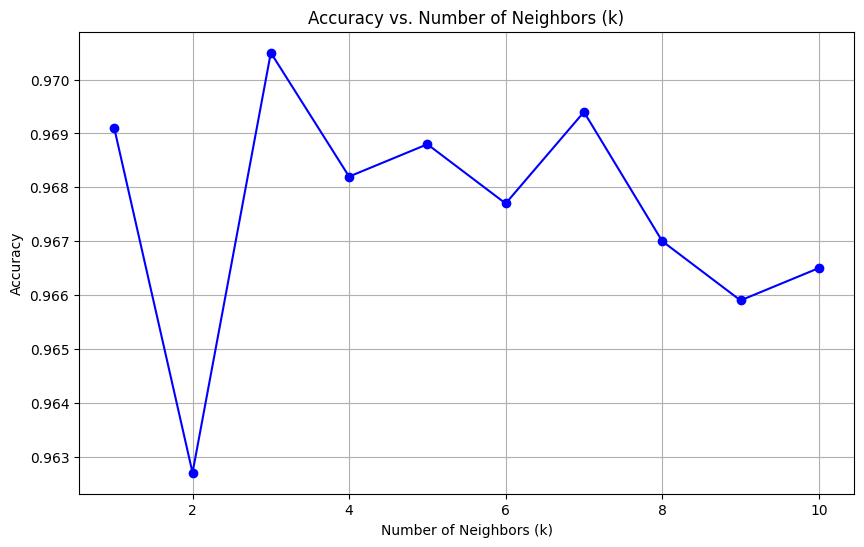

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#Draw the different accuracy of different n_neighbours values
plt.figure(figsize=(10, 6))
plt.plot(neighValues, accuracValues, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()





In [8]:
# Train the KNN model with the best accuracy index
K = neighValues[accuracValues.index(max(accuracValues))]
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train, y_train)
Predict = KNN.predict(x_test)

In [9]:
# confusion matrix
cm = confusion_matrix(y_test, Predict)


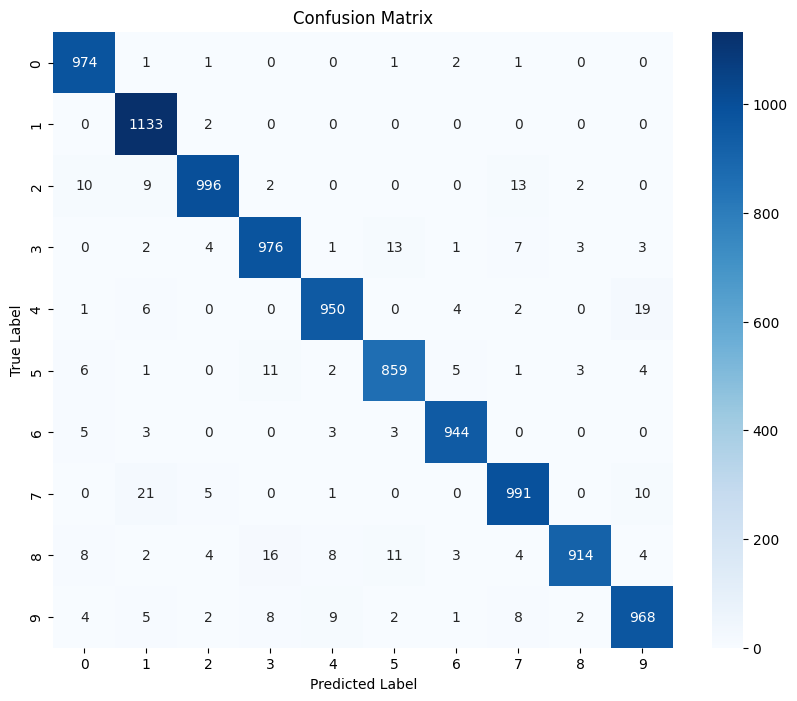

In [10]:
# Draw the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()